<a href="https://colab.research.google.com/github/HilbertN/Redes_Neuronales/blob/main/RN14_FunctionalApi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
from tensorflow.keras.optimizers import RMSprop, SGD
import numpy as np

In [ ]:
dataset=mnist.load_data()

(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)

x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255  # x_trainv = x_trainv/255
x_testv /= 255

num_classes=10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
inputs = keras.Input(shape=(784,))
x = layers.Dense(512, activation='sigmoid')(inputs)
x1 = layers.Dropout(0.2)(x)
x2 = layers.Dense(512,activation='relu')(x1)
x3 = layers.Dense(num_classes, activation='sigmoid')(x2)

model = keras.Model(inputs=inputs,outputs=x3)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

history = model.fit(x_trainv, y_trainc,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )




Epoch 1/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.7790 - accuracy: 0.7522 - val_loss: 0.3545 - val_accuracy: 0.8931
Epoch 2/10
 856/6000 [===>..........................] - ETA: 25s - loss: 0.4436 - accuracy: 0.8611

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(x_testv, y_testc, verbose=1)
print(score)
a=model.predict(x_testv)
print(a.shape)
print(a[1])
print("Es decir la predicción es ")
index = np.argmax(a[1])
print(index)
print("resultado correcto:")
print(y_testc[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3565 - accuracy: 0.8958
[0.35649561882019043, 0.895799994468689]
313/313 [==============================] - 1s 3ms/step
(10000, 10)
[9.6773976e-01 4.3453357e-01 9.9968559e-01 9.8255175e-01 3.7240208e-04
 9.5513594e-01 9.9849224e-01 6.8392146e-05 9.0266770e-01 7.2088372e-04]
Es decir la predicción es 
2
resultado correcto:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#Para guardar el modelo en disco
model.save("red.h5")

#para cargar la red:
modelo_cargado = tf.keras.models.load_model('red.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Ejemplo 2:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

In [ ]:
loss_tracker = keras.metrics.Mean(name="loss")

class Funsol(keras.Model):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =10 #Calibra la resolucion de la ec.dif
        x = tf.random.uniform((batch_size,), minval=-10, maxval=10)
        eq = 3*tf.math.sin(2*x) + 5*tf.math.sin(3*x)

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            loss = keras.losses.mean_squared_error(y_pred,eq)

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}


In [ ]:
class SinTransform(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(SinTransform,self).__init__()
        self.num_outputs = num_outputs

        self.freq = tf.range(1., self.num_outputs + 1)

        self.kernel = self.add_weight("kernel",
                                shape=[self.num_outputs])

    def call(self, inputs):
        inputs = tf.convert_to_tensor(inputs)
        if (inputs.shape == ()):
            inputs=(inputs,)
        elif (len(inputs.shape)==1):
            inputs=tf.expand_dims(inputs, axis=1)
        batch = tf.shape(inputs)[0]
        self.freq_b = tf.ones([batch,1])*self.freq
        args = self.freq_b * inputs
        modes = tf.math.sin(args)
        return tf.tensordot(modes,self.kernel,1)

In [ ]:
trans = SinTransform(5)
x = tf.random.uniform((3,), minval=-1, maxval=1)
print(x)
res=trans(x)
print(res)

tf.Tensor([-0.96240187 -0.8914561   0.14526033], shape=(3,), dtype=float32)
tf.Tensor([1.8082104  1.7662237  0.17657949], shape=(3,), dtype=float32)


In [ ]:
inputs = keras.Input(shape=(1,))
print(inputs)
x = SinTransform(5)(inputs)
model = Funsol(inputs=inputs,outputs=x)
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")
Model: "funsol_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 sin_transform_5 (SinTransf  (None,)                   5         
 orm)                                                            
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(model.predict((3.4,5.,2.)))

1/1 [==============================] - 0s 110ms/step
[-1.2541434   0.12687442 -0.50894415]


In [ ]:
model.compile(optimizer=SGD(learning_rate=0.01), metrics=['loss'])

x=tf.linspace(-10,10,100)
history = model.fit(x,epochs=100,verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 18.9540
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 23.0840
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 11.0011
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 8.4379
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 13.5144
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 6.7081
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 8.8386
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 7.8498
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 8.5353
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 6.0412
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 5.2176
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 9.3537
Epoch 13/100
4/4 [==============================] - 0s 3m

In [ ]:
model.summary()
print(model.layers[1].trainable_weights)

Model: "funsol_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 sin_transform_5 (SinTransf  (None,)                   5         
 orm)                                                            
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
[<tf.Variable 'kernel:0' shape=(5,) dtype=float32, numpy=
array([-1.4921228e-03,  2.9175546e+00,  4.8842645e+00, -2.7961457e-02,
        1.4673937e-02], dtype=float32)>]


4/4 [==============================] - 0s 3ms/step


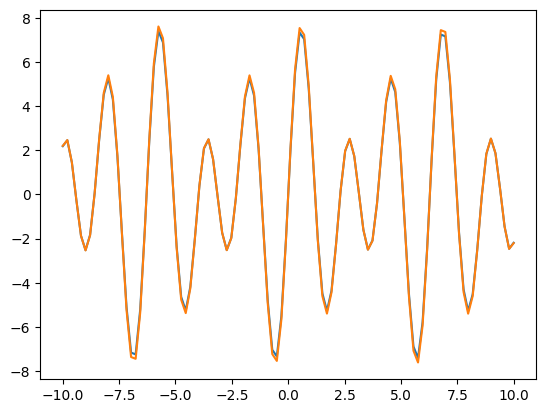

In [ ]:
x_testv = tf.linspace(-10,10,100)
a=model.predict(x_testv)

plt.plot(x_testv,a)
plt.plot(x_testv, 3.*tf.math.sin(2.*x) + 5*tf.math.sin(3.*x))
plt.show()